In [1]:
# Imports and data loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

red_wine = pd.read_csv('../input/winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('../input/winequality-white.csv', delimiter=';')
# Colour is just another feature
red_wine['red'] = 1
red_wine['white'] = 0
white_wine['red'] = 0
white_wine['white'] = 1
all_wine = pd.concat([red_wine, white_wine])
feature_names = all_wine.columns

### Read the manual
Information of interest from the description that comes with the dataset. 

> The classes are ordered and not balanced (e.g. there are munch more normal wines than
excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
or poor wines. 

Classes are imbalanced. Outlier detection recommended. 

> Also, we are not sure if all input variables are relevant. So
it could be interesting to test feature selection methods. 

Some features may be redundant. 

> Number of Instances: red wine - 1599; white wine - 4898. 

Total instances: 6497

> Number of Attributes: 11 + output attribute

Total attributes after combining datasets: 14. 13 feature, 1 target. 

>   Input variables (based on physicochemical tests):
   1 - fixed acidity  
   2 - volatile acidity  
   3 - citric acid  
   4 - residual sugar  
   5 - chlorides  
   6 - free sulfur dioxide  
   7 - total sulfur dioxide  
   8 - density  
   9 - pH  
   10 - sulphates  
   11 - alcohol  
   Output variable (based on sensory data):   
   12 - quality (score between 0 and 10)  

Plus 13 (red) and 14 (white), binary features indicating the colour of the wine. 

> Missing Attribute Values: None

There is no missing data, which makes this easier. 

In [2]:
# Look at a random sample of the data
all_wine.sample(5, random_state=4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
3615,7.2,0.24,0.30,1.2,0.037,11.0,95.0,0.98914,2.96,0.36,12.5,6,0,1
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5,1,0
3136,5.6,0.19,0.27,0.9,0.040,52.0,103.0,0.99026,3.50,0.39,11.2,5,0,1
1852,6.4,0.18,0.31,1.6,0.049,36.0,127.0,0.99340,3.60,0.67,10.4,7,0,1
991,7.1,0.34,0.28,2.0,0.082,31.0,68.0,0.99694,3.45,0.48,9.4,5,1,0


All data appears to be numeric, and the differences in magnitude are not extreme. Standardisation still required. 

Target variable (quality) is numeric, but discrete integers. Both classification and regression possible. 

In [3]:
# Descriptive statistics 
all_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


Counts equal total number of samples and each other in every case, which suggests no data is missing.  
Means are within the 25% and 75% for all features, and standard deviations are similar to the differences between the 25% and 75%, which is suggestive of normal distributions.  

array([ 1.72289176e+00,  1.49475134e+00,  4.71621754e-01,  1.43507284e+00,
        5.39858096e+00,  1.21978437e+00, -1.17720637e-03,  5.03485453e-01,
        3.86749481e-01,  1.79685503e+00,  5.65587110e-01,  1.89578911e-01,
        1.17882325e+00, -1.17882325e+00])

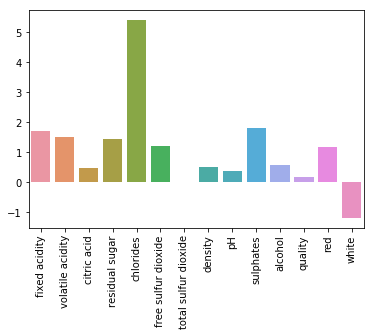

In [4]:
skew = stats.skew(all_wine)
g_skew = sns.barplot(x=feature_names, y=skew)
g_skew.set_xticklabels(labels=g_skew.get_xticklabels(), rotation=90);
skew

The only feature with skew having a magnitude greater than 3 is cholories. 

/home/chhk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


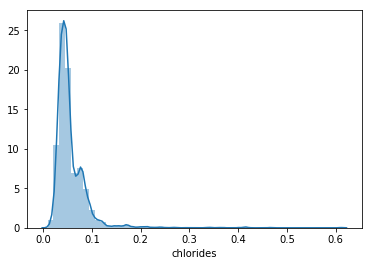

In [5]:
sns.distplot(all_wine['chlorides'])

Obviously very skewed. A standard way to deal with this is to take the logarithm of the heavily skewed variable. 

Chlorides skew: 0.876270


/home/chhk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


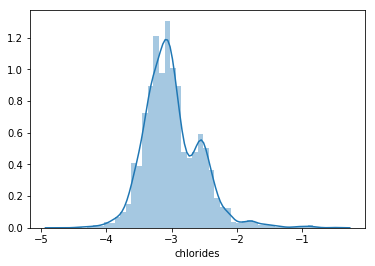

In [6]:
sns.distplot(np.log(all_wine['chlorides']))
print("Chlorides skew: %f" % stats.skew(np.log(all_wine['chlorides'])))

Much closer to normal, and therefore easier for models to learn from. 

array([ 5.05634314,  2.82227516,  2.39447137,  4.35499448, 50.85796611,
        7.89923149, -0.37230105,  6.60006079,  0.36645102,  8.64611713,
       -0.53220165,  0.23122015, -0.61037574, -0.61037574])

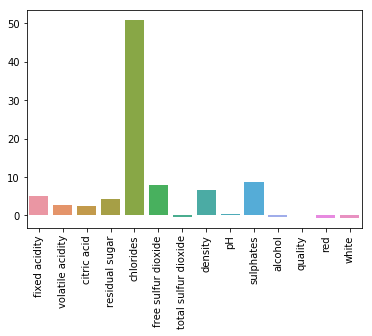

In [7]:
kurt = stats.kurtosis(all_wine, fisher=True)
g_kurt = sns.barplot(x=feature_names, y=kurt)
g_kurt.set_xticklabels(labels=g_kurt.get_xticklabels(), rotation=90);
kurt

Everything with a kurtosis greater than 5 can be reformed by taking it's logarithm. 

/home/chhk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Fixed acidity kurtosis: 5.056343
Log of fixed acidity kurtosis: 1.896783


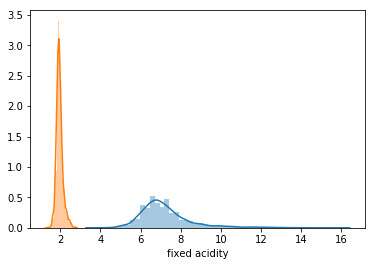

In [8]:
sns.distplot(all_wine['fixed acidity']) # Blue
print("Fixed acidity kurtosis: %f" % stats.kurtosis(all_wine['fixed acidity']))
sns.distplot(np.log(all_wine['fixed acidity'])) # Orange
print("Log of fixed acidity kurtosis: %f" % stats.kurtosis(np.log(all_wine['fixed acidity'])))

/home/chhk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Chlorides kurtosis: 50.857966
Log of chlorides kurtosis: 2.305355


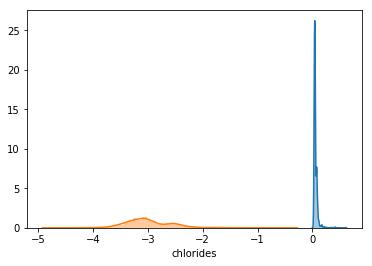

In [9]:
sns.distplot(all_wine['chlorides']) # Blue
print("Chlorides kurtosis: %f" % stats.kurtosis(all_wine['chlorides']))
sns.distplot(np.log(all_wine['chlorides'])) # Orange
print("Log of chlorides kurtosis: %f" % stats.kurtosis(np.log(all_wine['chlorides'])))

/home/chhk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Free sulfur dioxide kurtosis: 7.899231
Log of free sulfur dioxide kurtosis: 0.429675


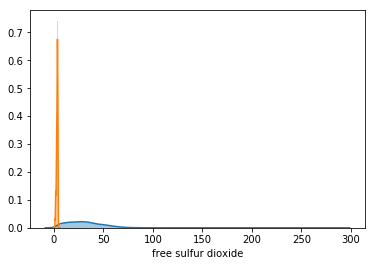

In [10]:
sns.distplot(all_wine['free sulfur dioxide']) # Blue
print("Free sulfur dioxide kurtosis: %f" % stats.kurtosis(all_wine['free sulfur dioxide']))
sns.distplot(np.log(all_wine['free sulfur dioxide'])) # Orange
print("Log of free sulfur dioxide kurtosis: %f" % stats.kurtosis(np.log(all_wine['free sulfur dioxide'])))

/home/chhk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Density kurtosis: 6.600061
Log of density kurtosis: 6.008338


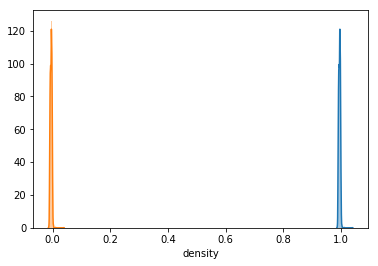

In [11]:
sns.distplot(all_wine['density']) # Blue
print("Density kurtosis: %f" % stats.kurtosis(all_wine['density']))
sns.distplot(np.log(all_wine['density'])) # Orange
print("Log of density kurtosis: %f" % stats.kurtosis(np.log(all_wine['density'])))

/home/chhk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Sulphates kurtosis: 8.646117
Log of sulphates kurtosis: 0.701296


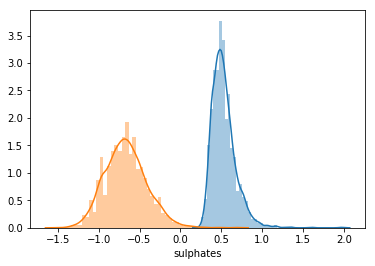

In [12]:
sns.distplot(all_wine['sulphates']) # Blue
print("Sulphates kurtosis: %f" % stats.kurtosis(all_wine['sulphates']))
sns.distplot(np.log(all_wine['sulphates'])) # Orange
print("Log of sulphates kurtosis: %f" % stats.kurtosis(np.log(all_wine['sulphates'])))

In four of the five cases, taking the log of the feature resulted in a significant reduction of kurtosis, except in the case of density, where it lessened the kurtosis by less than 10%. 

In [13]:
all_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
red                     6497 non-null int64
white                   6497 non-null int64
dtypes: float64(11), int64(3)
memory usage: 761.4 KB


Confirmably, there are 6497 data samples, none are null, and all are numeric. Additionally, all but the target variable and the two artificially added categorical variables describing the colour of the wine are decimal numbers. 

Now that basic descriptive statistics have been looked at, I will look for anomalies in the data, and outliars, and consider if they matter. 

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64


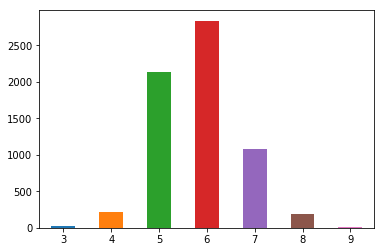

In [34]:
quality_counts = all_wine['quality'].value_counts().sort_index()
print(quality_counts)
g_quality = quality_counts.plot.bar()
g_quality.set_xticklabels(labels=g_quality.get_xticklabels(), rotation=(0));

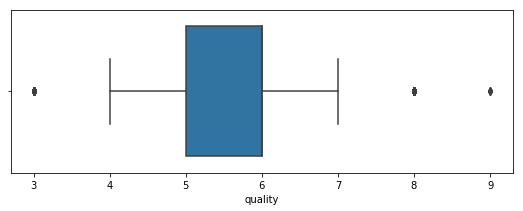

In [71]:
fig_quality_boxplot, ax_quality_boxplot = plt.subplots(figsize=(9,3))
sns.boxplot(all_wine['quality'], ax=ax_quality_boxplot)

Wines scoring <=3 and >=8 are highly unusual, being shown as outliers in the above boxplot. Put together, all samples scoring 3, 8, or 9 made up only 3.5% of all the data, and so may not cause much inaccuracy to remove. Removing them could, however, hinder the prediction of particularly low or high quality wine. 

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
red                    -0.119323
white                   0.119323
Name: quality, dtype: float64


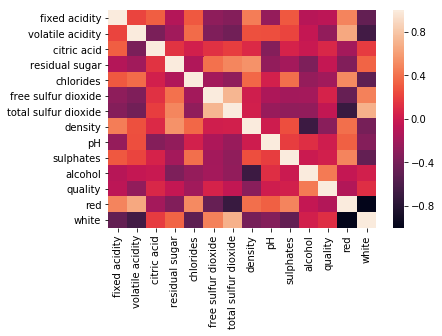

In [83]:
# Correlation with the target variable 
corr = all_wine.corr();
print(corr['quality'])
sns.heatmap(corr)

In [84]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,-0.487218


There are no meaningful or significant correlations that I can find that require further action for the purposes of this project. I will now being the model training. 